In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

u'%.2f'

In [222]:
def show(data):
    data.plot(figsize=(16,9))

def cumret(ret):
    return (1 + ret).cumprod() - 1

In [226]:
# Earliest available date for VEU
# TODO: Do this study with analog indexes that go further back
start_dt = datetime.datetime(2007, 3, 8) 
end_dt = datetime.datetime(2015, 9, 3)

In [227]:
import pandas.io.data as web

SPY = web.DataReader("SPY", 'yahoo', start_dt, end_dt)['Adj Close']
VNQ = web.DataReader("VNQ", 'yahoo', start_dt, end_dt)['Adj Close']
VEU = web.DataReader("VEU", 'yahoo', start_dt, end_dt)['Adj Close']
TIP = web.DataReader("TIP", 'yahoo', start_dt, end_dt)['Adj Close']
TLT = web.DataReader("TLT", 'yahoo', start_dt, end_dt)['Adj Close']

In [228]:
universe = pd.concat([SPY, VNQ, VEU, TIP, TLT], axis=1, keys=['SPY', 'VNQ', 'VEU', 'TIP', 'TLT'])

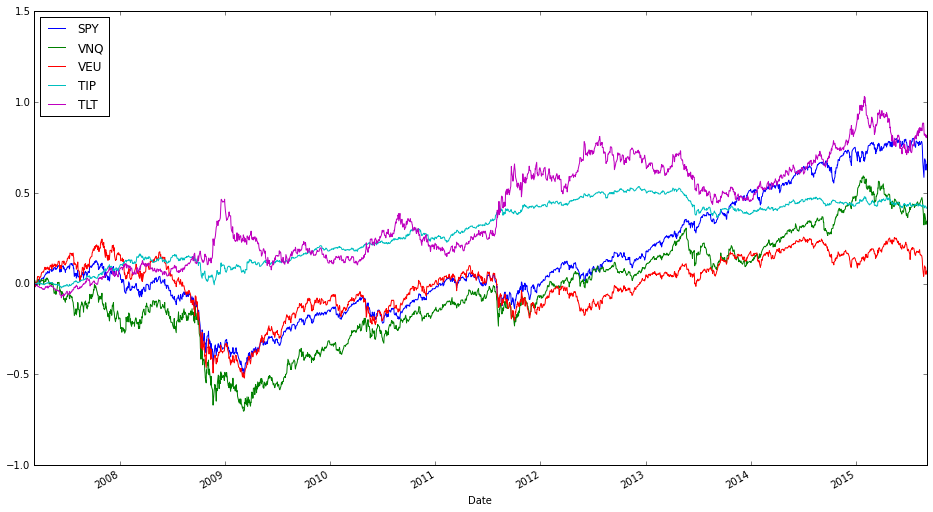

In [230]:
show(cumret(universe.pct_change().fillna(0)))

In [396]:
universe.head()

,SPY,VNQ,VEU,TIP,TLT
Date,,,,,
2007-03-08,118.057466,54.747346,41.060355,78.184331,67.050226
2007-03-09,118.091014,55.472708,41.334305,77.827921,66.345217
2007-03-12,118.267175,55.749031,41.527684,77.897656,66.604957
2007-03-13,115.968766,54.436480,40.439937,78.207574,67.005700
2007-03-14,116.832764,54.698989,40.488282,78.215318,66.701430


In [236]:
import portfolio
weights = [0.3, 0.2, 0.2, 0.15, 0.15]

# We have to convert the target market value weights above into
# per-share weighting (according to share prices)
price_weights = universe / universe.sum(axis=1)
target_price_weights = weights / price_weights

portfolio_prices = portfolio.portfolio_prices(universe, target_price_weights)
portfolio_returns = portfolio.portfolio_returns(universe, target_price_weights, 1)

In [238]:
cumret(portfolio_returns[0]).iloc[-1]

0.65263663598620814

In [239]:
cumret(SPY.pct_change()).iloc[-1]

0.65724371891905209

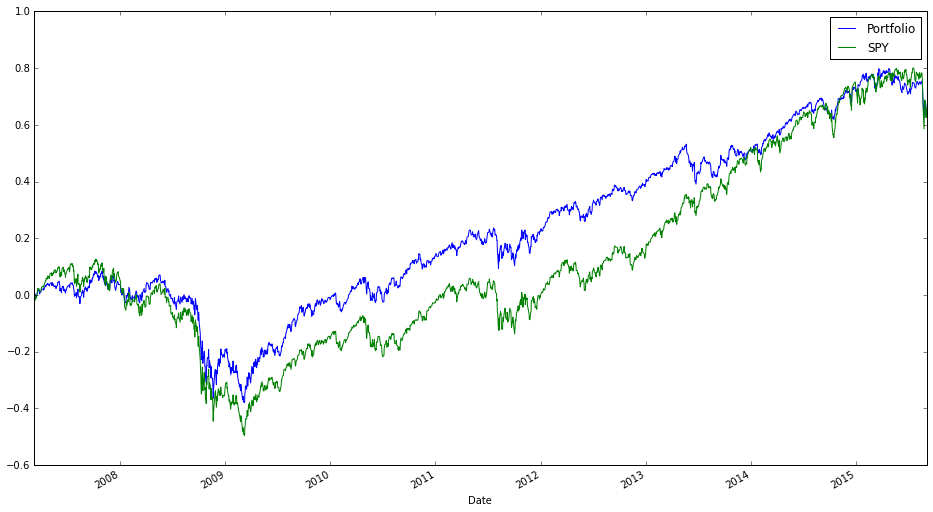

In [237]:
show(pd.concat([
            cumret(portfolio_returns[0]),
            cumret(SPY.pct_change())],
        axis=1,
        keys=['Portfolio', 'SPY']))

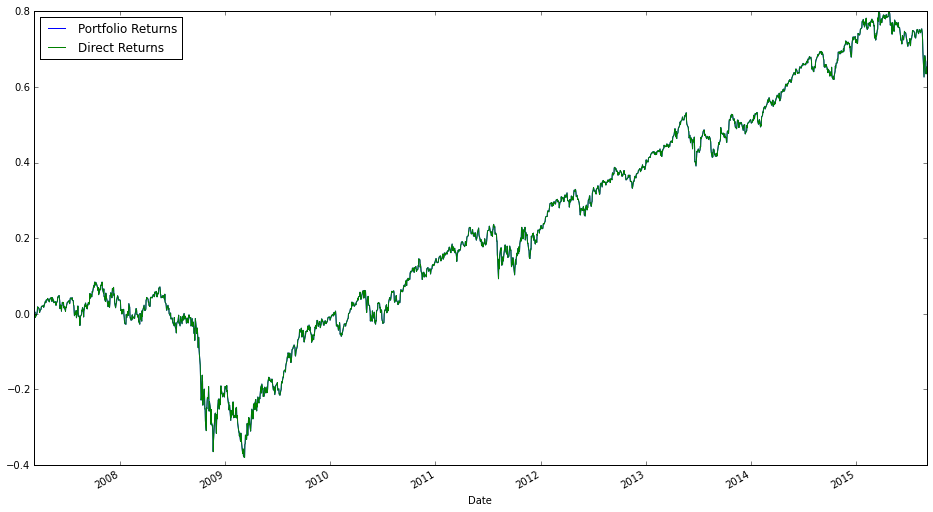

In [332]:
# Take different approach, and just calculate weighted returns directly
weighted_returns = weights * universe.pct_change().fillna(0)
portfolio_returns2 = (weighted_returns).sum(axis=1)

# No difference between these two
show(pd.concat([
            cumret(portfolio_returns[0]),
            cumret(portfolio_returns2)],
        keys=['Portfolio Returns', 'Direct Returns'],
        axis=1))

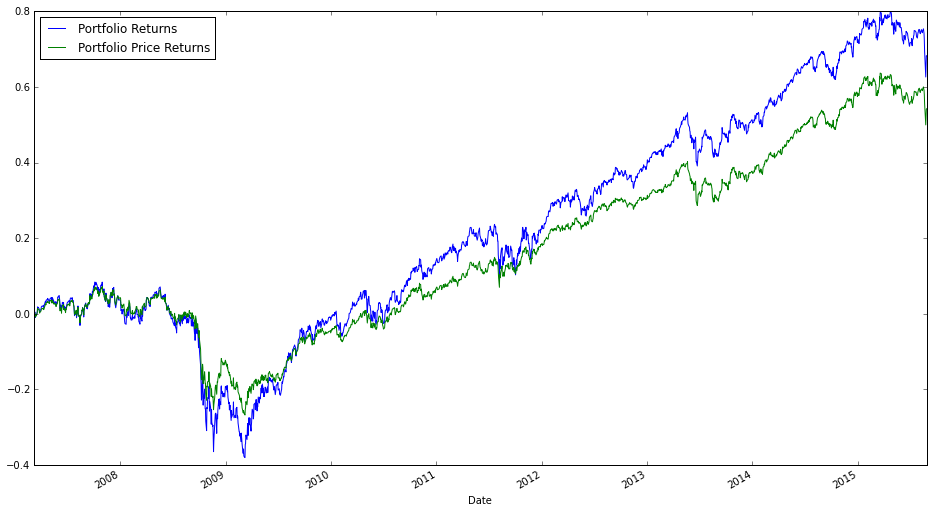

In [202]:
# But there is a difference between these two
show(pd.concat([
            cumret(portfolio_returns[0]),
            cumret(portfolio_prices.pct_change())],
        keys=['Portfolio Returns', 'Portfolio Price Returns'],
        axis=1))

# Why? Because the second one there shows the percent changes of the portfolio market value as a whole
# on each given day, which is not the same as the percent changes of the instruments of the portfolio multiplied
# by the weights given to each instrument. 
#
# In other words, the second is documenting changes in a weighted portfolio market value (i.e. the amount
# of capital needed to control a single unit of the portfolio), while the first is documenting the actual
# weighted returns of the instruments making up the portfolio (i.e. the returns on that capital).
#
# One other way to look at it is that the second is showing the returns according to the 
# composite value after rebalancing, while the first is showing the actual returns that are causing 
# that rebalancing (which are the true returns of the portfolio).
#
# This is why the second is muted compared to the first -- it's only representing snapshots of market
# value, rather than the movements that cause that market value.

In [404]:
reload(formulae)

<module 'formulae' from 'formulae.py'>

In [406]:
import formulae

print "Portfolio -- Sharpe ratio: %.2f, APR: %.3f, Drawdown: %.2f, Max Time in Drawdown: %d" % (
    formulae.annual_sharpe(portfolio_returns[0]),
    formulae.apr(portfolio_returns[0]),
    formulae.drawdown(portfolio_returns[0]).max(),
    formulae.time_in_drawdown(portfolio_returns[0]).max())

print "SPY -- Sharpe ratio: %.2f, APR: %.3f, Drawdown: %.2f, Max Time in Drawdown: %d" % (
    formulae.annual_sharpe(SPY.pct_change()),
    formulae.apr(SPY.pct_change()),
    formulae.drawdown(SPY.pct_change()).max(),
    formulae.time_in_drawdown(SPY.pct_change()).max())

Portfolio -- Sharpe ratio: 0.43, APR: 0.077, Drawdown: 0.46, Max Time in Drawdown: 725
SPY -- Sharpe ratio: 0.38, APR: 0.087, Drawdown: 0.62, Max Time in Drawdown: 1223


In [321]:
def series(proto):
    s = pd.Series(np.zeros(len(proto)), index=proto.index)
    s[:] = np.nan
    return s

diff = series(VNQ_slice)
threeDayAvg = series(VNQ_slice)

for i in range(len(VNQ_slice)):
    history = VNQ_slice.ix[:(i+1),]
    current = VNQ_slice.ix[i]
    day = VNQ_slice.index[i]
    
    diff[day] = current['Close'] - current['Adj Close']
    if i >= 2:
        threeDayAvg[day] = history['Close'].tail(3).mean()
    


In [322]:
threeDayAvg

Date
2015-06-22          NaN
2015-06-23          NaN
2015-06-24    77.396668
2015-06-25    76.780002
2015-06-26    76.306669
2015-06-29    75.580002
2015-06-30    75.103335
2015-07-01    75.110000
dtype: float64

In [320]:
pd.rolling_mean(VNQ_slice['Close'], 3)

Date
2015-06-22          NaN
2015-06-23          NaN
2015-06-24    77.396668
2015-06-25    76.780002
2015-06-26    76.306669
2015-06-29    75.580002
2015-06-30    75.103335
2015-07-01    75.110000
dtype: float64